# Import Required Libraries
Import the necessary libraries, including pandas, numpy, and seaborn.

In [2]:
# Importing the necessary libraries

import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import seaborn as sns  # For data visualization

# Load Data from CSV
Use pandas to load data from the 'ACN_data_new_features.csv' file.

In [3]:
# Load data from CSV file
data = pd.read_csv('ACN_data_new_features_with_monthly_high_low.csv')

# Display the first 5 rows of the dataframe
data.head()

,open,high,low,close,volume,Name,EMA14,EMA20,EMA50,EMA100,...,cross_100,cross_200,prev_cross,prev_cross_14,prev_cross_20,prev_cross_50,prev_cross_100,prev_cross_200,monthly_high,monthly_low
0,73.01,73.710,72.82,73.31,2000477,ACN,73.310000,73.310000,73.310000,73.310000,...,0,0,0,0,0,0,0,0,73.71,72.82
1,73.09,73.270,72.10,73.07,1880055,ACN,73.278000,73.287143,73.300588,73.305248,...,0,0,0,0,0,0,0,0,73.71,72.10
2,72.89,73.495,72.58,73.37,1710274,ACN,73.290267,73.295034,73.303310,73.306530,...,1,1,0,0,0,0,0,0,73.71,72.10
3,73.32,73.710,73.20,73.56,1884631,ACN,73.326231,73.320269,73.313377,73.311549,...,0,0,1,1,1,1,1,1,73.71,72.10
4,73.21,73.500,72.66,73.13,2096346,ACN,73.300067,73.302148,73.306185,73.307954,...,-1,-1,0,0,0,0,0,0,73.71,72.10


# Data Cleaning and Preprocessing
Clean the data by handling missing values, outliers, and incorrect data types.

In [4]:
# Remove the column Name, as the data is related to just one stock here
data = data.drop('Name', axis=1)

# Checking for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Filling missing values with mean of the respective column
data.fillna(data.mean(), inplace=True)

Missing values in each column:
 open              0
high              0
low               0
close             0
volume            0
EMA14             0
EMA20             0
EMA50             0
EMA100            0
EMA200            0
cross             0
cross_14          0
cross_20          0
cross_50          0
cross_100         0
cross_200         0
prev_cross        0
prev_cross_14     0
prev_cross_20     0
prev_cross_50     0
prev_cross_100    0
prev_cross_200    0
monthly_high      0
monthly_low       0
dtype: int64


In [5]:
# Checking for outliers in the 'high' column using Z-score
from scipy import stats
z_scores = np.abs(stats.zscore(data['high']))
outliers = data[z_scores > 3]  # Define outliers as any data point more than 3 standard deviations from the mean
print("Number of outliers in 'high' column: ", len(outliers))

Number of outliers in 'high' column:  0


In [6]:
# Removing outliers
data = data[z_scores <= 3]

In [7]:
# Display the cleaned data
data.head()

,open,high,low,close,volume,EMA14,EMA20,EMA50,EMA100,EMA200,...,cross_100,cross_200,prev_cross,prev_cross_14,prev_cross_20,prev_cross_50,prev_cross_100,prev_cross_200,monthly_high,monthly_low
0,73.01,73.710,72.82,73.31,2000477,73.310000,73.310000,73.310000,73.310000,73.310000,...,0,0,0,0,0,0,0,0,73.71,72.82
1,73.09,73.270,72.10,73.07,1880055,73.278000,73.287143,73.300588,73.305248,73.307612,...,0,0,0,0,0,0,0,0,73.71,72.10
2,72.89,73.495,72.58,73.37,1710274,73.290267,73.295034,73.303310,73.306530,73.308233,...,1,1,0,0,0,0,0,0,73.71,72.10
3,73.32,73.710,73.20,73.56,1884631,73.326231,73.320269,73.313377,73.311549,73.310738,...,0,0,1,1,1,1,1,1,73.71,72.10
4,73.21,73.500,72.66,73.13,2096346,73.300067,73.302148,73.306185,73.307954,73.308939,...,-1,-1,0,0,0,0,0,0,73.71,72.10


In [8]:
# drop the columns that are not required for analysis
# the EMA and Cross columns can be dropped
# data = data.drop(['EMA14', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'cross', 'cross_14', 'cross_20', 'cross_50', 'cross_100', 'cross_200'], axis=1)

# standardise the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Display the scaled data
data_scaled.head()


,open,high,low,close,volume,EMA14,EMA20,EMA50,EMA100,EMA200,...,cross_100,cross_200,prev_cross,prev_cross_14,prev_cross_20,prev_cross_50,prev_cross_100,prev_cross_200,monthly_high,monthly_low
0,0.026485,0.032226,0.041535,0.032838,0.050525,0.007661,0.003742,0.000116,0.000063,0.000036,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.002245,0.042191
1,0.027357,0.027436,0.033707,0.030237,0.046175,0.007295,0.003477,0.000000,0.000000,0.000000,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.002245,0.034239
2,0.025177,0.029886,0.038926,0.033489,0.040042,0.007435,0.003568,0.000033,0.000017,0.000009,...,1.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.002245,0.034239
3,0.029864,0.032226,0.045667,0.035548,0.046340,0.007847,0.003861,0.000157,0.000084,0.000047,...,0.5,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.002245,0.034239
4,0.028665,0.029940,0.039796,0.030888,0.053988,0.007547,0.003651,0.000069,0.000036,0.000020,...,0.0,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.002245,0.034239


# Exploratory Data Analysis
Perform exploratory data analysis to understand the distribution of data and the relationship between different features.

Correlation Matrix:
                     open      high       low     close    volume     EMA14  \
open            1.000000  0.999567  0.999636  0.999116 -0.259445  0.997302   
high            0.999567  1.000000  0.999482  0.999607 -0.252377  0.997309   
low             0.999636  0.999482  1.000000  0.999563 -0.268010  0.996789   
close           0.999116  0.999607  0.999563  1.000000 -0.259205  0.996750   
volume         -0.259445 -0.252377 -0.268010 -0.259205  1.000000 -0.244657   
EMA14           0.997302  0.997309  0.996789  0.996750 -0.244657  1.000000   
EMA20           0.996149  0.996190  0.995598  0.995582 -0.242663  0.999802   
EMA50           0.991860  0.992011  0.991329  0.991395 -0.238592  0.997068   
EMA100          0.987240  0.987450  0.986849  0.986943 -0.236012  0.992773   
EMA200          0.981926  0.982099  0.981740  0.981787 -0.234737  0.987331   
cross          -0.018418 -0.010305 -0.008494 -0.000675 -0.066324 -0.014050   
cross_14       -0.018418 -0.010305 -0.00849

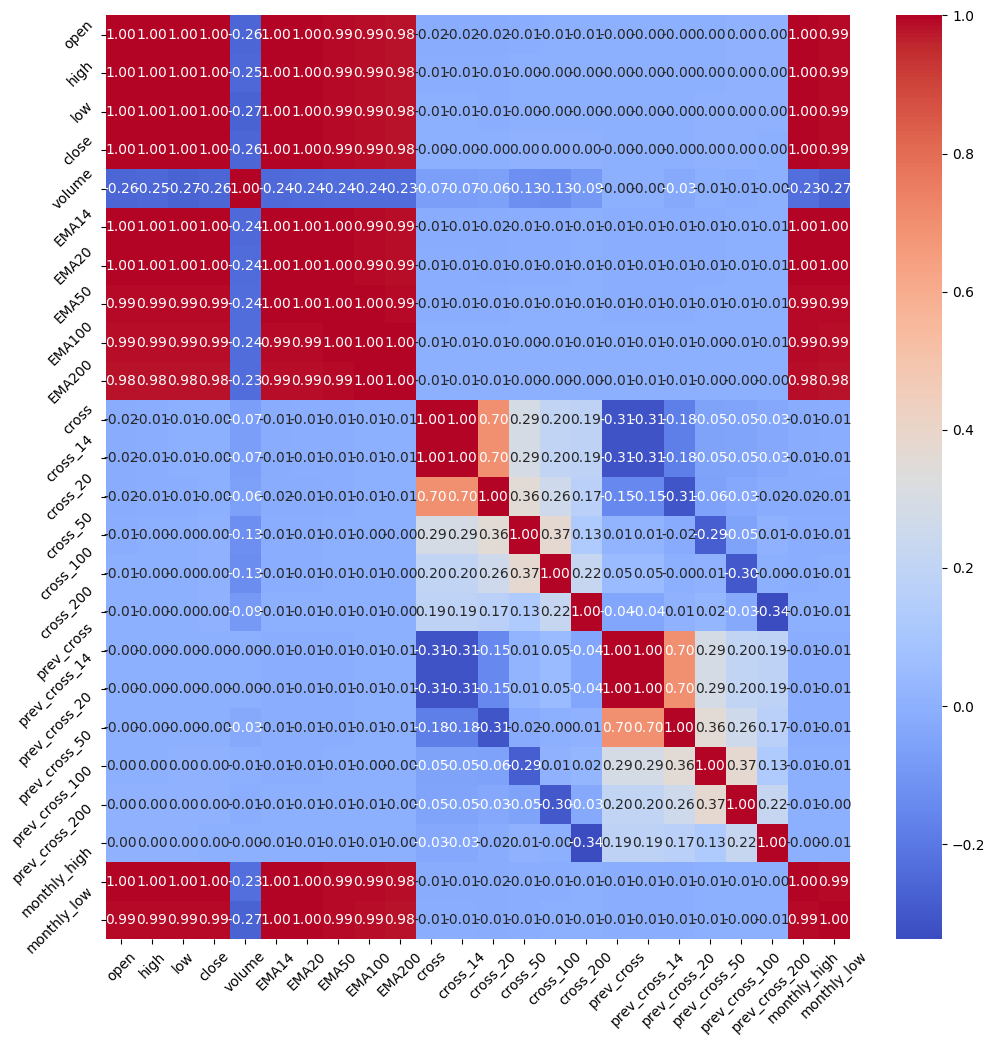

In [9]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
correlation_matrix = data_scaled.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Set a larger figure size
plt.figure(figsize=(12, 12))

# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
correlation_matrix = data_scaled.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Set a larger figure size
plt.figure(figsize=(12, 12))

# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

In [ ]:
# Correlation matrix
correlation_matrix = data_scaled.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Set a larger figure size
plt.figure(figsize=(12, 12))

# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

In [ ]:
# Distribution of 'high' feature
sns.distplot(data_scaled['high'])

# Boxplot for 'high' feature to understand its spread
sns.boxplot(data_scaled['high'])

# Pairplot to visualize the relationship between features
sns.pairplot(data_scaled)

# Scatter plot between 'high' and other features
for column in data_scaled.columns:
    if column != 'high':
        sns.scatterplot(data_scaled['high'], data_scaled[column])

# Correlation of 'high' with other features
correlation_with_high = data_scaled.corr()['high'].sort_values(ascending=False)
print("Correlation of 'high' with other features:\n", correlation_with_high)

# Feature Correlation Analysis
Use correlation matrix to find the features that are correlated to the 'high' feature.

In [ ]:
# Feature Correlation Analysis

# Create a correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Find the correlation of 'high' with other features
correlation_with_high = correlation_matrix['high'].sort_values(ascending=False)

# Display the correlation of 'high' with other features
print("\nCorrelation of 'high' with other features:\n", correlation_with_high)

# Plotting the correlation of 'high' with other features
correlation_with_high.drop('high').plot.barh()
plt.title('Correlation of features with "high"')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()